# Predicting Terrorist Attacks

### Exploratory data analysis Indonesia

#### Date : August 31, 2018

## Terror in Indonesia from 1977 - 2017
In this notebook I want to give an overview about terror attacks in Indonesia. The following results are based on the provided Global Terrorism Database. Since the establishment of the Indonesia state in 1945 its citizens faced a large amount of terrorist attacks. This data exploration should at least give an overview about the victims, attackers and development of terrorism in Ind since the last 40 years.

#### Notebook Configuration

In [14]:
import numpy as np
import pandas as pd
import folium
import warnings
warnings.filterwarnings('ignore')
import datetime
import calendar

import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline 

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

from IPython.display import display, Markdown, Latex
matplotlib.rcParams['figure.figsize'] = (12.0, 5.0)

#### Load the Datasets
Load the dataset created by the preprocessing-2 notebook.

In [15]:
df = pd.read_csv("dataset/processed_2_globalterrorismdb_0718dist.csv" ,encoding='ISO-8859-1')
df_il = df[df.country_txt == "Indonesia"]
df_il.head()

,Unnamed: 0,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,...,guncertain1_txt,individual_txt,claimed_txt,property_txt,ishostkid_txt,INT_LOG_txt,INT_IDEO_txt,INT_MISC_txt,INT_ANY_txt,incident_date
5468,5571,1977,11,29,Indonesia,Southeast Asia,North Sumatra,UNKNOWN,3.585242,98.675598,...,NO,NO,UKNOWN,YES,NO,NO,YES,YES,YES,1977-11-29
6213,6340,1978,5,16,Indonesia,Southeast Asia,Papua,UNKNOWN,-2.533000,140.717000,...,NO,NO,UKNOWN,NO,YES,UKNOWN,UKNOWN,NO,UKNOWN,1978-05-16
6736,6891,1978,10,20,Indonesia,Southeast Asia,UNKNOWN,Jakarta,-6.208821,106.846046,...,NO,NO,UKNOWN,NO,NO,UKNOWN,UKNOWN,NO,UKNOWN,1978-10-20
12739,13179,1981,3,28,Indonesia,Southeast Asia,Jakarta,Jakarta,-6.208821,106.846046,...,NO,NO,UKNOWN,NO,YES,NO,NO,NO,NO,1981-03-28
20533,21464,1984,3,26,Indonesia,Southeast Asia,UNKNOWN,Yuroot,-4.346411,138.094482,...,NO,NO,UKNOWN,NO,YES,UKNOWN,UKNOWN,YES,YES,1984-03-26


#### Number of terror attacks over time
Sadly, there wasn't a single period without terrorism in the last 40 years in Indonesia.....

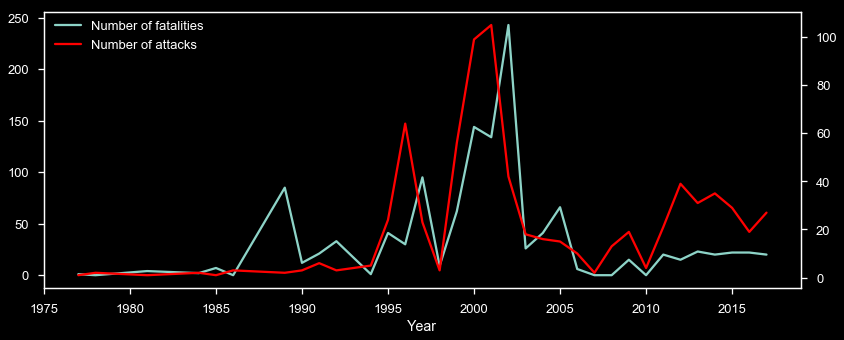

In [16]:
data = df_il.groupby("iyear").nkill.sum()
data = data.reset_index()
data.columns = ["Year", "Number of fatalities"]

ax = data.plot(x="Year", y="Number of fatalities", legend=False)
ax2 = ax.twinx()

data = df_il.groupby("iyear").nkill.count()
data = data.reset_index()
data.columns = ["Year", "Number of attacks"]

data.plot(x="Year", y="Number of attacks", ax=ax2, legend=False, color="r")
ax.figure.legend(bbox_to_anchor=(0.05, 0.92), loc="upper left")
plt.tight_layout()
plt.show()

#### Victim groups
The largest victim group of terror in Indonesia are private citizens & property as shown in the upcoming chart (based in the number of attacks).

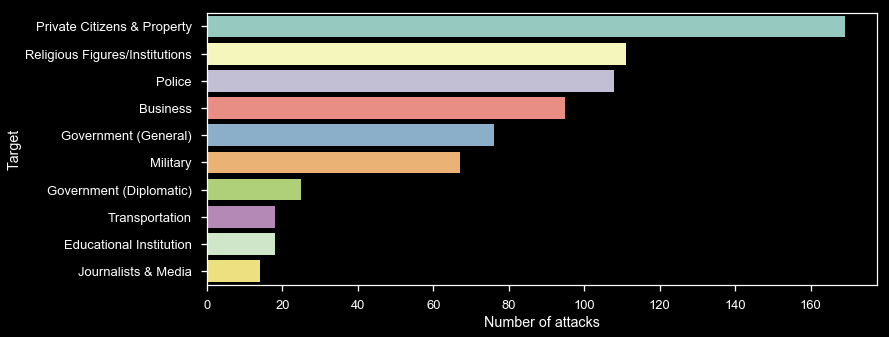

In [19]:
data = df_il.groupby("targtype1_txt").iyear.count().sort_values(ascending=False)[:10]
data = data.reset_index()
data.columns = ["Target", "Number of attacks"]
sns.barplot(data=data, x=data.columns[1], y=data.columns[0]);

#### Geographical exploration over time
The terror in Indonesia changed over time. In the upcoming charts, I want to give you an overview of the different decades.

Explanation for geographical visualization: In the maps created with folium, each circle represents a terrorist attack. The radius of the circle is depending on the amount of fatalities - bigger circle means more people who got killed in the attack. Red circles are terrorist attacks, where I assume based on the dataset that civilian casualities were specifically planned or at least tolerated. This includes every entry in the dataset with none of those target types:

Food or Water Supply
Government (Diplomatic)
Government (General)
Journalists & Media
Other
Police
Telecommunication
Terrorists/Non-State Militia
Utilities
Violent Political Party
Of course with most of those target types, terrorists also aim at or accept civilian casualities. But for visualization purpose I marked them in blue and group them as institutional target types.

Disclaimer: In the dataset the terrorist organization is often marked as 'Unknown'. I exclude those dataset entries in the upcoming analysis of top terrorist groups during a specific time

<center style='background: black;'><font color='white' size='12'>Terror attacks from 1977 to 1980</font></center>

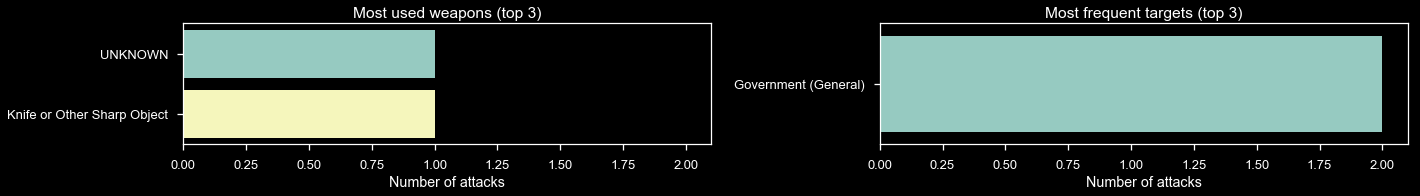

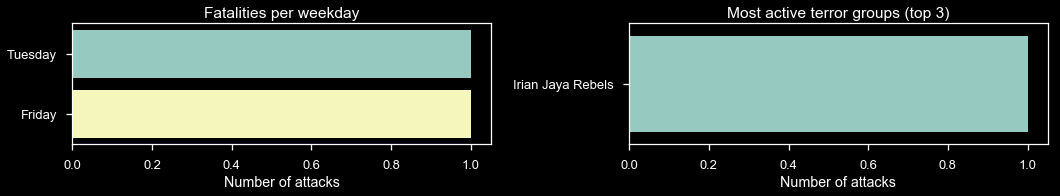

<hr></hr>

<center style='background: black;'><font color='white' size='12'>Terror attacks from 1980 to 1990</font></center>

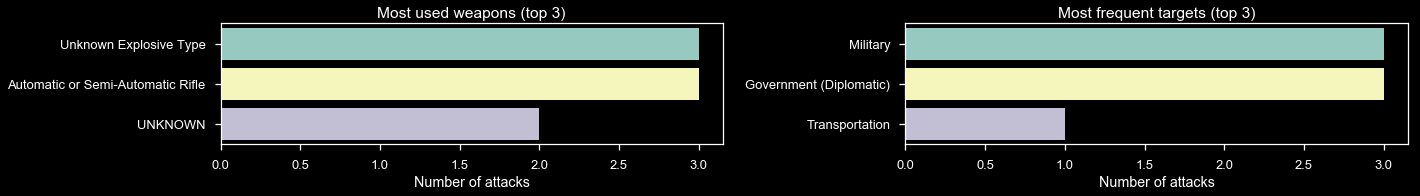

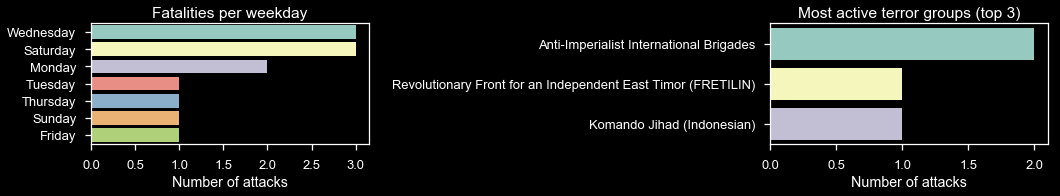

<hr></hr>

<center style='background: black;'><font color='white' size='12'>Terror attacks from 1990 to 2000</font></center>

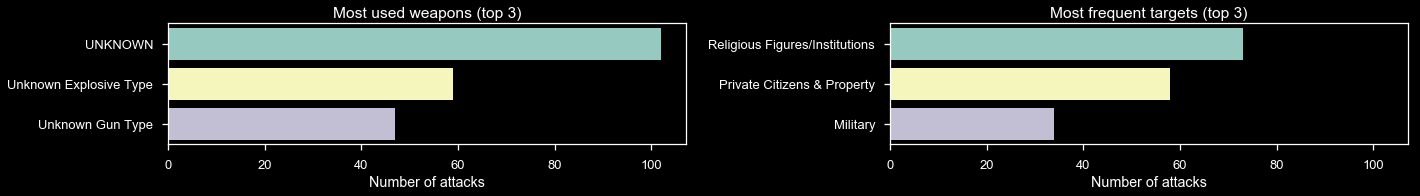

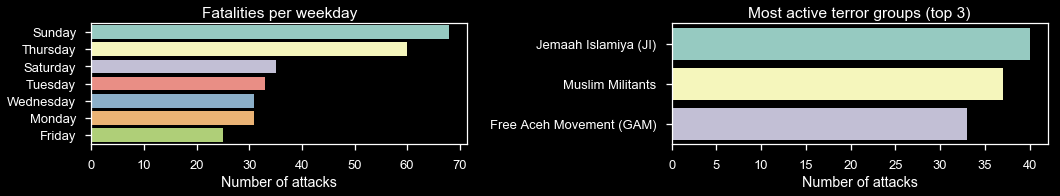

<hr></hr>

<center style='background: black;'><font color='white' size='12'>Terror attacks from 2000 to 2010</font></center>

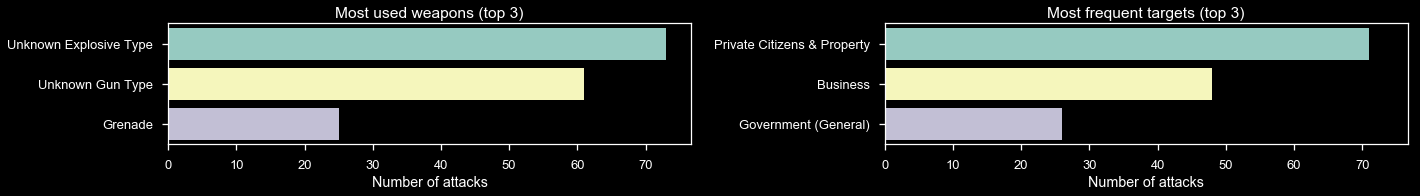

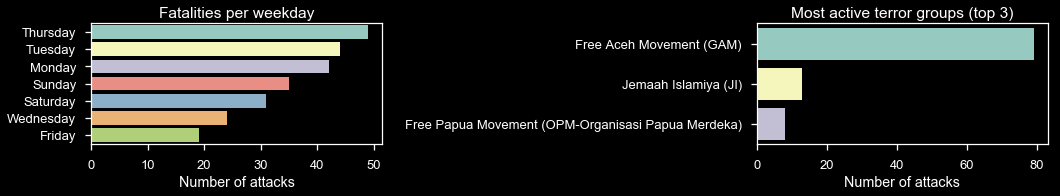

<hr></hr>

<center style='background: black;'><font color='white' size='12'>Terror attacks from 2010 to 2017</font></center>

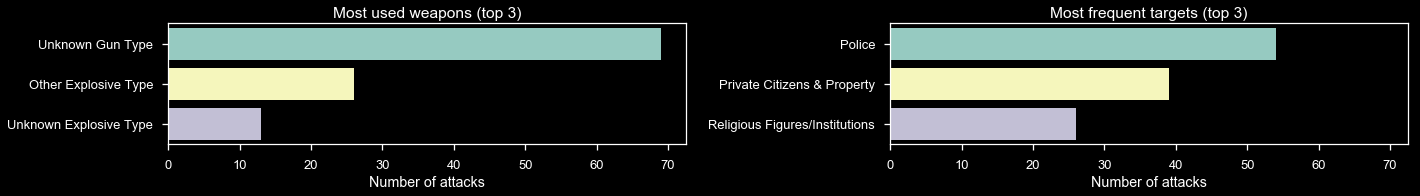

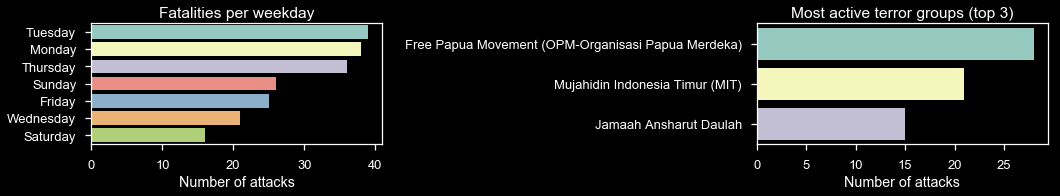

<hr></hr>

In [22]:
for year in [[df_il.iyear.min(), 1980], [1980, 1990],
             [1990, 2000], [2000, 2010], [2010, df_il.iyear.max()]
            ]:
    
    m = folium.Map(
    location=[-8.650000, 115.216667],
    zoom_start=4,
    tiles='Stamen Toner'
    )
    
    data = df_il.query("{} < iyear <= {}".format(year[0], year[1]))
    data = data.drop(data[data.iday < 1].index)
    data['weekday'] = [calendar.day_name[datetime.datetime(day.iyear, day.imonth, day.iday).weekday()] for i, day in data.iterrows()]
    data['date'] = [datetime.datetime(day.iyear, day.imonth, day.iday) for i, day in data.iterrows()]

    non_civ_target = ['Food or Water Supply', 'Government (Diplomatic)',
       'Government (General)', 'Journalists & Media', 'Other', 'Police', 'Telecommunication',
       'Terrorists/Non-State Militia', 'Utilities', 'Violent Political Party']
    
    for i in range(len(data)):
        row = data.iloc[i]
        
        if row.targtype1_txt in non_civ_target:
            color = '#6b9cff'
        elif row.targtype1_txt == 'Unknown':
            color = "#e3b57e"
        else:
            color = '#9b5353'       
        
        desc = "Type: {}; Number fatalities: {}; Number wounded: {}; Year: {}".format(row.attacktype1_txt, row.nkill, row.nwound, row.iyear)
        if not pd.isnull(row.longitude):
            folium.CircleMarker(
                location=[row.latitude, row.longitude],
                radius=row.nkill,
                popup=desc,
                color=color,
                fill=color

            ).add_to(m)
            
    display(Markdown("<center style='background: black;'><font color='white' size='12'>Terror attacks from {} to {}</font></center>".format(year[0], year[1])))
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(20,3), facecolor='black')
    
    data_sub = data.groupby("weapsubtype1_txt").iyear.count().sort_values(ascending=False).iloc[:3]
    data_sub = data_sub.reset_index()
    data_sub.columns = ["Weapon Type", "Number of attacks"]
    sns.barplot(data=data_sub, x=data_sub.columns[1], y=data_sub.columns[0], ax=ax1)
    
    data_sub = data.groupby("targtype1_txt").iyear.count().sort_values(ascending=False).iloc[:3]
    data_sub = data_sub.reset_index()
    data_sub.columns = ["Target", "Number of attacks"]    
    sns.barplot(data=data_sub, x=data_sub.columns[1], y=data_sub.columns[0], ax=ax2)
    
    ax1.set_title('Most used weapons (top 3)')
    ax1.set_ylabel('')
    ax2.set_title('Most frequent targets (top 3)')
    ax2.set_ylabel('')   

    plt.tight_layout()
    plt.show()
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,3), facecolor='black')
    
    data_sub = data.groupby("weekday").nkill.count().sort_values(ascending=False).iloc[:]
    data_sub = data_sub.reset_index()
    data_sub.columns = ["Weekday", "Number of attacks"]    
    sns.barplot(data=data_sub, x=data_sub.columns[1], y=data_sub.columns[0], ax=ax1)


    data_sub = data.groupby("gname").iyear.count().sort_values(ascending=False)
    data_sub = data_sub.reset_index()
    data_sub = data_sub.drop(data_sub[data_sub.gname == 'Unknown'].index)[:3]

    data_sub.columns = ["Attacker", "Number of attacks"]
    sns.barplot(data=data_sub, x=data_sub.columns[1], y=data_sub.columns[0], ax=ax2)
    
    ax1.set_title('Fatalities per weekday')
    ax1.set_ylabel('')
    ax2.set_title('Most active terror groups (top 3)')
    ax2.set_ylabel('')     
    
    plt.tight_layout()
    plt.show()
    
    display(m)
    display(Markdown("<hr></hr>"))

#### Overview about target and victim groups
Which terrorist organizations are performing all of those attacks according to the data? In the next visualization you can see a heatmap, that shows for every terrorist organization how much people got killed or wounded. For visualization purpose this heatmap only shows the 10 most active terrorist groups and the 10 most targeted victim groups. The visualization shows, that Hamas is the most active group when it comes to the Transportation and Private Citizens groups.

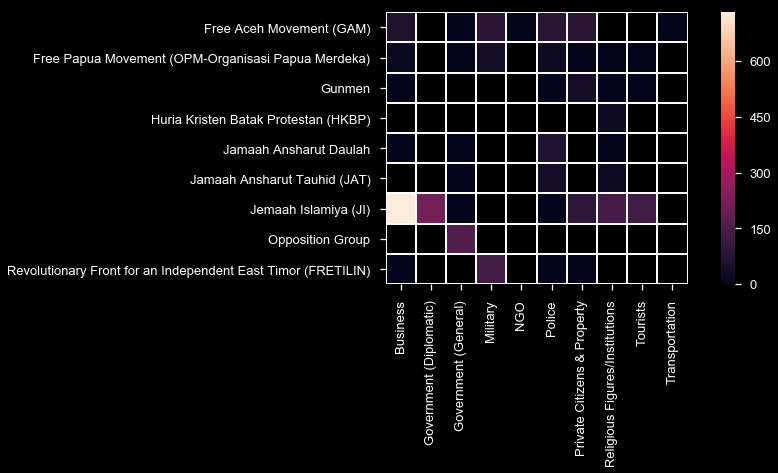

In [23]:
data = df_il.groupby(["gname", "targtype1_txt"])[['nkill', 'nwound']].sum()
data = data.reset_index()
data = data[data.targtype1_txt != 'Unknown']
data = data[data.gname != 'Unknown']
data = data[data.gname.isin(list(df_il.groupby("gname").nwound.sum().sort_values(ascending=False)[:10].index.tolist()))]
data = data[data.targtype1_txt.isin(list(df_il.groupby("targtype1_txt").nwound.sum().sort_values(ascending=False)[:10].index.tolist()))]


data = data.fillna(0)
data['nvictim'] = data.nkill + data.nwound
del data['nkill']
del data['nwound']
sns.heatmap(data.pivot('gname', 'targtype1_txt', 'nvictim'),square=True, linewidths=1, linecolor='white')
plt.ylabel('')
plt.xlabel('');